In [1]:
from dataset_coroutine import dataset_coroutine
from build_image_hist import get_color_histograms_of_images, color_hist_to_2d

In [2]:
link_1 = '/home/jupyter/datasphere/s3/garbage-data/drone-photo/' +\
         '2021 год, Южно-Камчатский заказник, Охотоморское побережье (1)/'
         
link_2 = '/home/jupyter/datasphere/s3/garbage-data/drone-photo/' +\
         '2021 год, Южно-Камчатский заказник, Охотоморское побережье (1)/участок на 4 речке'
         
link_3 = '/home/jupyter/datasphere/s3/garbage-data/drone-photo/' + \
         '2021 год, Южно-Камчатский заказник, Охотоморское побережье (2)/'

link_4 = '/home/jupyter/datasphere/s3/garbage-data/drone-photo/' +\
         '2023 год лето, Южно-Камчатский заказник, Охотоморское побережье/1 km'
         
link_5 = '/home/jupyter/datasphere/s3/garbage-data/drone-photo/' +\
         '2023 год осень, сопредельная с Южно-Камчатским заказником территория, Охотоморское побережье/' +\
         'от 1 речки в сторону поселка'

link_6 = '/home/jupyter/datasphere/s3/garbage-data/drone-photo/' +\
         '2023 год осень, сопредельная с Южно-Камчатским заказником территория, Охотоморское побережье/' +\
         'участок ближе к поселку'
         
link_7 = '/home/jupyter/datasphere/s3/garbage-data/drone-photo/' +\
         'P010_Okhotskoe_more_19_07_2020/' +\
         'Photo'

In [3]:
import numpy as np

data_cor = dataset_coroutine(
    [link_1, link_2, link_3, link_4, link_5, link_6, link_7], 
    each_n=2000, 
    total_n=np.inf
)

hists = get_color_histograms_of_images(data_cor)

odc_number:  2000
odc_number:  2000
odc_number:  2000
odc_number:  2000
odc_number:  2000
odc_number:  2000
odc_number:  2000
total_number:  14000


In [4]:
import pickle

def load_reducer(umap_path='./umap/umap.file'):
    reducer = pickle.load((open(umap_path, 'rb')))
    return reducer

reducer = load_reducer()
umap_hists = color_hist_to_2d(hists, reducer)

2024-04-06 11:01:53.600494: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-06 11:01:53.643168: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-06 11:01:54.431411: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [5]:
import matplotlib.pyplot as plt

def draw_box(box, color, pass_if_inf=True):    
    if pass_if_inf:
        if (box['l'] == -np.inf) | (box['r'] == np.inf):
            return
        if (box['d'] == -np.inf) | (box['d'] == np.inf):
            return
        
    plt.plot([box['l'], box['r']], [box['d'], box['d']], color=color)
    plt.plot([box['l'], box['r']], [box['u'], box['u']], color=color)
    plt.plot([box['l'], box['l']], [box['d'], box['u']], color=color)
    plt.plot([box['r'], box['r']], [box['d'], box['u']], color=color)
    
def check_in_box(umap_hists, box):
    x_mask = (box['l'] <= umap_hists[0]) & (umap_hists[0] < box['r'])
    y_mask = (box['d'] <= umap_hists[1]) & (umap_hists[1] < box['u'])
    return x_mask & y_mask

In [7]:
def assign_labels(umap_hists):
    boxes = {
        11: {'l':-np.inf, 'r':np.inf, 'd':-10.5, 'u':-2.5},
        10: {'l':-np.inf, 'r':np.inf, 'd':-2.5, 'u':np.inf},
        9: {'l':-np.inf, 'r':np.inf, 'd':-np.inf, 'u':-10.5},
        8: {'l':-np.inf, 'r':0.5, 'd':-np.inf, 'u':np.inf},
        7: {'l':2.2, 'r':10, 'd':1, 'u':8},
        6: {'l':15, 'r':20, 'd':-6.1, 'u':4},
        5: {'l':3, 'r':5.6, 'd':-17.5, 'u':-14.7},
        4: {'l':4, 'r':6.5, 'd':-12, 'u':-7.25},
        3: {'l':0.5, 'r':6.5, 'd':-7.25, 'u':-2.5},
        2: {'l':-1.3, 'r':4, 'd':-13.5, 'u':-7.25},
        1: {'l':-2.3, 'r':0.5, 'd':-7.25, 'u':-1.5}
    }
    
    labels = np.zeros(umap_hists.shape[1], dtype=int)
    boxes_line = sorted(list(boxes.items()), reverse=True)
    for label, box in boxes_line:
        box_mask = check_in_box(umap_hists, box)
        labels[box_mask] = label
    return labels

labels = assign_labels(umap_hists)

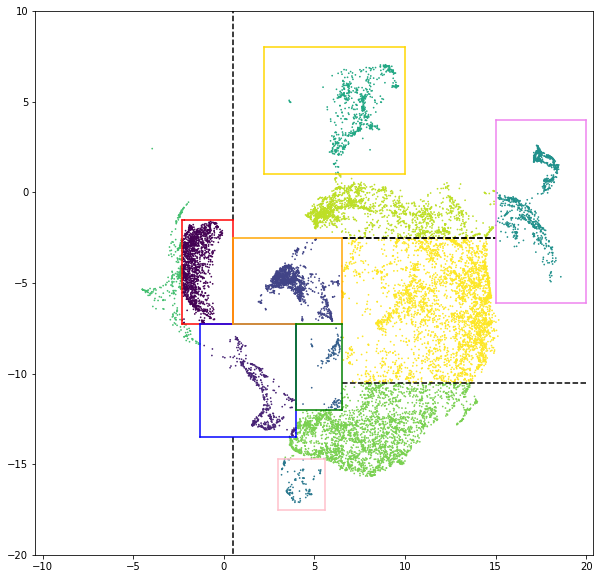

In [8]:
def draw_clusters(umap_hists, labels):
    alpha=1
    s=0.5

    plt.figure(figsize=(10, 10))
    plt.scatter(umap_hists[0], umap_hists[1], c=labels, alpha=alpha, s=s);


    box_11 = {'l':-np.inf, 'r':np.inf, 'd':-10.5, 'u':-2.5}
    plt.plot([6.5, 15], [-2.5, -2.5], color='black', linestyle='--')

    box_10 = {'l':-np.inf, 'r':np.inf, 'd':-2.5, 'u':np.inf}
    plt.plot([6.5, 15], [-2.5, -2.5], color='black', linestyle='--')

    box_9 = {'l':-np.inf, 'r':np.inf, 'd':-np.inf, 'u':-10.5}
    plt.plot([6.5, 20], [-10.5, -10.5], color='black', linestyle='--')

    box_8 = {'l':-np.inf, 'r':0.5, 'd':-np.inf, 'u':np.inf}
    plt.plot([0.5, 0.5], [-1.5, 10], color='black', linestyle='--')
    plt.plot([0.5, 0.5], [-13.5, -20], color='black', linestyle='--')

    box_1 = {'l':-2.3, 'r':0.5, 'd':-7.25, 'u':-1.5}
    draw_box(box_1, color='red')

    box_2 = {'l':-1.3, 'r':4, 'd':-13.5, 'u':-7.25}
    draw_box(box_2, color='blue')

    box_3 = {'l':0.5, 'r':6.5, 'd':-7.25, 'u':-2.5}
    draw_box(box_3, color='orange')

    box_4 = {'l':4, 'r':6.5, 'd':-12, 'u':-7.25}
    draw_box(box_4, color='green')

    box_5 = {'l':3, 'r':5.6, 'd':-17.5, 'u':-14.7}
    draw_box(box_5, color='pink')

    box_6 = {'l':15, 'r':20, 'd':-6.1, 'u':4}
    draw_box(box_6, color='violet')

    box_7 = {'l':2.2, 'r':10, 'd':1, 'u':8}
    draw_box(box_7, color='gold')

    plt.axis('equal');
    plt.xlim([-10, 20])
    plt.ylim([-20, 10])

    plt.show()
    
draw_clusters(umap_hists, labels)
# plt.savefig('./images/umap_colored_labels.png');